In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVR, LinearSVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error as rmse, accuracy_score, balanced_accuracy_score, f1_score
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## Data preparation

In [2]:
df = pd.read_csv('data/epi_r.csv')
print(df.shape)
df.head(1)

(20052, 680)


,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.5,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
df = pd.read_csv('data/epi_r.csv')
to_drop = ['#cakeweek', '#wasteless', '22-minute meals', '3-ingredient recipes',
           '30 days of groceries', 'advance prep required', 'alabama', 'alaska', 'alcoholic',
           'anniversary', 'anthony bourdain', 'aperitif', 'appetizer', 'arizona', 
           'atlanta','australia','back to school','backyard bbq','basil','bass','bastille day',
           'beverly hills','birthday','blender','boil','bok choy','bon appétit','bon app��tit',
           'boston','braise','breakfast','broil','brooklyn','brunch','buffalo','buffet',
           'bulgaria','california','cambridge','camping','canada','candy thermometer','casserole/gratin',
          'chicago','chile','chill','christmas','christmas eve','cobbler/crumble','cocktail',
            'cocktail party','coffee grinder','colorado','columbus','condiment','condiment/spread',
            'connecticut','cook like a diner','cookbook critic','cookie','cuba','dairy',
            'dairy free','dallas','date','deep-fry','denver','dessert','digestif','dip',
            'diwali','dominican republic','dorie greenspan','double boiler','drinks','easter',
            'eau de vie','edible gift','egypt','emeril lagasse','engagement party',
            'england','entertaining','epi + ushg','epi loves the microwave','fall','family reunion',
'fat free',"father's day",'fig','flaming hot summer','florida','fontina','food processor',
'fourth of july','france','frangelico','frankenrecipe','freeze/chill','freezer food','friendsgiving',
'frittata','frozen dessert','fruit','fry','game','garlic','georgia','germany','gourmet',
'graduation','grains','grand marnier','grill','grill/barbecue','guam','haiti','hanukkah','hawaii','healdsburg',
'healthy','herb','high fiber','hollywood','hominy/cornmeal/masa',"hors d'oeuvre",'hot drink','house & garden',
'house cocktail','houston','ice cream machine','idaho','illinois','indiana','iowa','ireland',
'israel','italy','jamaica','japan','juicer','kansas','kansas city','kentucky',
'kentucky derby','kid-friendly','kidney friendly','kirsch','kitchen olympics','kosher',
'kosher for passover','labor day','lancaster','las vegas','lasagna','leafy green','legume','london',
'long beach','los angeles','louisiana','louisville','low cal','low carb','low cholesterol',
'low fat','low sodium','low sugar','low/no sugar','lunar new year','lunch','macaroni and cheese',
'maine','mandoline','mardi gras','margarita','marinade','marinate','maryland','massachusetts','meatloaf','mexico','miami',
'michigan','microwave','minneapolis','minnesota','mississippi','missouri','mixer','monterey jack',
'mortar and pestle',"mother's day",'nancy silverton','nebraska','new hampshire','new jersey',
'new mexico','new orleans',"new year's day","new year's eve",'new york','no meat, no problem',
'no sugar added','no-cook','non-alcoholic','north carolina','ohio','oklahoma','oktoberfest','one-pot meal','oregon','organic',
'oscars','pacific palisades','pan-fry','parade','paris','party','pasadena','passover','pasta maker','pastry','peanut free','pennsylvania','persian new year','peru',
'pescatarian','philippines','phyllo/puff pastry dough','pickles','picnic','pie','pittsburgh','poach','poker/game night','port',
'portland','pot pie','providence','punch','quick & easy','quick and healthy','ramadan','ramekin','raw','rhode island',
'roast','root vegetable','rosh hashanah/yom kippur','rub','sage','salad dressing','san francisco','sandwich',
'sandwich theory','santa monica','sauce','sauté','seattle','seed','self','shower','side','simmer',
'skewer','slow cooker','smoker','smoothie','south carolina','spain','spirit','spring','bake','dinner',
'spritzer','spice','st. louis',"st. patrick's day",'steam','stew','stir-fry', 'burrito', 'brownie', 'cupcake',
'stock','squash','stuffing/dressing','sugar conscious','sugar snap pea','summer','super bowl',
'suzanne goin','switzerland','tart','tennessee','tested & improved','texas','thanksgiving','tree nut',
'tree nut free','triple sec','tropical fruit','utah',"valentine's day",'vegan','vegetable',
'vegetarian','vermont','virginia','washington','washington, d.c.','wedding','weelicious', 'soy free',
'west virginia','westwood','wheat/gluten-free','windsor','winter','wisconsin','wok',
'yellow squash','cookbooks','leftovers','snack','snack week','cr��me de cacao','anise',
 'breadcrumbs','brine','calvados','campari','capers','cardamom','chambord',
 'clove','costa mesa','crêpe','cumin','grappa', 'hamburger', 'drink', 
 'halloween','harpercollins','jalapeño','jícama','kahlúa','kwanzaa','lemongrass','lingonberry',
 'marscarpone','mezcal','midori','nutmeg','oregano','orzo','paleo','paprika',
 'pernod','potluck','purim','quince','rosemary','rosé','saffron','shallot','shavuot','soufflé/meringue',
 'sourdough','sukkot','tailgating','tarragon','thyme','yonkers']

df.drop(to_drop, axis=1, inplace=True)
df.rename({'milk/cream':'milk', 
           'sweet potato/yam':'sweet potato',
           'green onion/scallion': 'green onion',
           'cognac/armagnac':'cognac',
           'soup/stew': 'soup',
           'butterscotch/caramel':'caramel',
           'jam or jelly': 'jam'}, axis=1, inplace=True)

In [4]:
df.to_csv('data/epi_r_cut.csv', index=False)

In [5]:
for col in df.columns:
    print(f"'{col}'", end=', ')

'title', 'rating', 'calories', 'protein', 'fat', 'sodium', 'almond', 'amaretto', 'anchovy', 'apple', 'apple juice', 'apricot', 'artichoke', 'arugula', 'asian pear', 'asparagus', 'aspen', 'avocado', 'bacon', 'banana', 'barley', 'bean', 'beef', 'beef rib', 'beef shank', 'beef tenderloin', 'beer', 'beet', 'bell pepper', 'berry', 'biscuit', 'bitters', 'blackberry', 'blue cheese', 'blueberry', 'bourbon', 'bran', 'brandy', 'bread', 'brie', 'brisket', 'broccoli', 'broccoli rabe', 'brown rice', 'brussel sprout', 'bulgur', 'butter', 'buttermilk', 'butternut squash', 'caramel', 'cabbage', 'cake', 'candy', 'cantaloupe', 'caraway', 'carrot', 'cashew', 'cauliflower', 'caviar', 'celery', 'champagne', 'chard', 'chartreuse', 'cheddar', 'cheese', 'cherry', 'chestnut', 'chicken', 'chickpea', 'chile pepper', 'chili', 'chive', 'chocolate', 'cilantro', 'cinco de mayo', 'cinnamon', 'citrus', 'clam', 'coconut', 'cod', 'coffee', 'cognac', 'collard greens', 'cookies', 'coriander', 'corn', 'cornmeal', 'cottage 

## Parse data from api and recipes

In [6]:
api_key = 'SmPYB4v9WYhjeLd9zHtDCstEhi11uy9iJ2Vg2ha6'

In [7]:
ingredients = list(df.columns[6:])
len(ingredients)

299

In [8]:
stack = []
def get_data(ingr):
    url = f'https://api.nal.usda.gov/fdc/v1/foods/search?query={ingr}&dataType=Survey%20(FNDDS)'
    try:
        response = requests.get(url, auth=(api_key, ''))
        food = response.json()['foods'][0]['foodNutrients']
        df = pd.DataFrame(food)[['nutrientName','value']]
        df['ingr'] = ingr
        return df
    except Exception:
        stack.append(ingr)

In [9]:
def get_api(arr_ingr):
    col = {'Calcium, Ca': 'Calcium', 'Choline, total': 'Choline', 'Copper, Cu': 'Copper',
           'Total lipid (fat)': 'Fat', 'Fiber, total dietary': 'Dietary Fiber',
           'Iron, Fe': 'Iron', 'Folate, DFE': 'Folate', 'Magnesium, Mg': 'Magnesium',
           'Phosphorus, P': 'Phosphorus', 'Potassium, K': 'Potassium',
           'Fatty acids, total saturated': 'Saturated fat', 'Selenium, Se': 'Selenium',
           'Sodium, Na': 'Sodium', 'Vitamin A, RAE': 'Vitamin A', 'Vitamin B-12': 'Vitamin B12',
           'Vitamin B-6': 'Vitamin B6', 'Vitamin C, total ascorbic acid': 'Vitamin C',
           'Vitamin D (D2 + D3)': 'Vitamin D', 'Vitamin E (alpha-tocopherol)': 'Vitamin E',
           'Vitamin K (phylloquinone)': 'Vitamin K', 'Zinc, Zn': 'Zinc',
           'Carbohydrate, by difference': 'Total carbohydrates'}
    df = pd.DataFrame()
    for i in arr_ingr:
        df = df.append(get_data(i))
    df = pd.pivot_table(df, index=['ingr'], columns=df['nutrientName'])
    df.columns = df.columns.droplevel([0])
    df.rename(col, axis='columns', inplace=True)
    return df

In [10]:
def get_recipe(recipe):
    url = 'https://www.epicurious.com/search/' + recipe
    data = requests.get(url).text
    soup = BeautifulSoup(data, "lxml")
    for a in soup.find_all('a', href=True):
        if '/recipes/food/views/' in a['href']:
            return 'https://www.epicurious.com' + str(a['href'])

In [11]:
def daily_norm_func():
    di = pd.read_csv('data/daily_intakes.csv')
    di = di[['Nutrient', 'Adults and Children≥ 4 years']]
    di.columns = ['component', 'value']
    dr = pd.read_csv('data/daily_references.csv')
    dr = dr[['Food Component', 'Adults and Children ≥ 4 years']]
    dr.columns = ['component', 'value']
    dr = dr.append(di, ignore_index=True).dropna()
    return dr

In [12]:
def nutrients_norm():
    facts = pd.read_csv('data/nutrients.csv',index_col=[0])
    daily_norm = daily_norm_func()
    for c in facts.columns:
        divisor = daily_norm[daily_norm.component == c]['value'].values[0]
        facts[c] = facts[c].div(divisor)
    facts.to_csv('data/nutrients_norm.csv')

In [ ]:
%%time
recipies = [get_recipe(i) for i in df.title]
df['recipies'] = recipies
df[['title', 'recipies']].to_csv('data/recipies.csv')

In [ ]:
daily_norm = daily_norm_func()
api = get_api(ingredients)
api[set(daily_norm.component) & set(api.columns)].to_csv('data/nutrients.csv')

In [13]:
nutrients_norm()

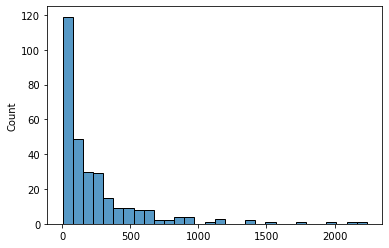

In [5]:
sns.histplot(df.iloc[:,6:].sum(axis=0))

In [6]:
df.iloc[:,6:].sum().sort_values(ascending=False)[:20]

onion        2238.0
tomato       2140.0
milk         1995.0
egg          1768.0
salad        1516.0
cheese       1355.0
chicken      1344.0
soup         1164.0
ginger       1146.0
potato       1128.0
lemon        1104.0
pasta         968.0
fish          936.0
pork          928.0
nut           905.0
citrus        863.0
chocolate     855.0
mushroom      843.0
orange        837.0
beef          811.0
dtype: float64

In [7]:
np.savetxt('data/names.csv', np.array(df.columns[6:]), fmt='%s', delimiter=',')

## Naive prediction

In [8]:
X, y = df.iloc[:, 6:].values, df.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
naive_prediction = np.zeros(y.shape) + y.mean()
print('Naive prediction for full set: ', rmse(y, naive_prediction))
naive_prediction_test = np.zeros(y_test.shape) + y.mean()
print('Naive prediction for test set: ', rmse(y_test, naive_prediction_test))

Naive prediction for full set:  1.797731922584762
Naive prediction for test set:  1.708845744553229


## Different algos for regression

In [9]:
def check_baseline_model(model):
    model.fit(X_train, y_train)
    print('Train score is: ', rmse(y_train, model.predict(X_train)))
    print('Test score is: ', rmse(y_test, model.predict(X_test)))
    
def check_model_cv(model, parameters, name='', metrics=rmse, scoring='neg_mean_squared_error'):
    kr = GridSearchCV(model, parameters, scoring=scoring, cv=3)
    kr.fit(X_train, y_train)
    means = kr.cv_results_['mean_test_score']
    stds = kr.cv_results_['std_test_score']
    print('Current model is ', name)
    for mean, std, params in zip(means, stds, kr.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print('Test score:')
    y_pred = kr.best_estimator_.predict(X_test)
    print(metrics(y_test, y_pred))
    return kr.best_estimator_

## LR

In [10]:
lr = LinearRegression(fit_intercept=False)
check_baseline_model(lr)
lr = LinearRegression(fit_intercept=True)
check_baseline_model(lr)

Train score is:  3.716850176873194
Test score is:  3.8307332959529456
Train score is:  1.5977487125287333
Test score is:  1.609597963553188


## Ridge and Lasso

In [11]:
parameters = {'alpha': [100, 10, 1, 0.1, 0.01, 0.001]}
ridge = Ridge(fit_intercept=False)
check_model_cv(ridge, parameters, 'Ridge')
ridge = Ridge(fit_intercept=True)
check_model_cv(ridge, parameters, 'Ridge with intercept')

Current model is  Ridge
-4.106 (+/-0.078) for {'alpha': 100}
-3.845 (+/-0.079) for {'alpha': 10}
-3.850 (+/-0.082) for {'alpha': 1}
-3.860 (+/-0.084) for {'alpha': 0.1}
-3.862 (+/-0.084) for {'alpha': 0.01}
-3.862 (+/-0.084) for {'alpha': 0.001}
Test score:
3.8230032493703363
Current model is  Ridge with intercept
-1.675 (+/-0.021) for {'alpha': 100}
-1.666 (+/-0.037) for {'alpha': 10}
-1.677 (+/-0.049) for {'alpha': 1}
-1.685 (+/-0.054) for {'alpha': 0.1}
-1.686 (+/-0.054) for {'alpha': 0.01}
-1.686 (+/-0.054) for {'alpha': 0.001}
Test score:
1.593777072360062


Ridge(alpha=10)

In [12]:
parameters = {'alpha': [100, 10, 1, 0.1, 0.01, 0.001]}
lasso = Lasso(fit_intercept=False)
check_model_cv(lasso, parameters, 'Lasso')
lasso = Lasso(fit_intercept=True)
check_model_cv(lasso, parameters, 'Lasso with intercept')

Current model is  Lasso
-15.605 (+/-0.049) for {'alpha': 100}
-15.605 (+/-0.049) for {'alpha': 10}
-15.605 (+/-0.049) for {'alpha': 1}
-8.949 (+/-0.256) for {'alpha': 0.1}
-4.592 (+/-0.088) for {'alpha': 0.01}
-3.875 (+/-0.079) for {'alpha': 0.001}
Test score:
3.850277036130119
Current model is  Lasso with intercept
-1.820 (+/-0.030) for {'alpha': 100}
-1.820 (+/-0.030) for {'alpha': 10}
-1.820 (+/-0.030) for {'alpha': 1}
-1.820 (+/-0.030) for {'alpha': 0.1}
-1.739 (+/-0.020) for {'alpha': 0.01}
-1.666 (+/-0.029) for {'alpha': 0.001}
Test score:
1.59387122216125


Lasso(alpha=0.001)

## RF

In [13]:
# parameters = {'max_depth': [10, 30, 50],
#               'n_estimators': [100, 200, 300]}
parameters = {'max_depth': [50],
              'n_estimators': [100]}
rf = RandomForestRegressor()
check_model_cv(rf, parameters, 'RF')

Current model is  RF
-1.693 (+/-0.068) for {'max_depth': 50, 'n_estimators': 100}
Test score:
1.6567481112509932


RandomForestRegressor(max_depth=50)

## Final regression model

In [14]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)

LinearRegression()

In [15]:
filename = 'data/finalized_regression.sav'
pickle.dump(lr, open(filename, 'wb'))

# Classification

In [16]:
yb = np.round(y)
X_train, X_test, y_train, y_test = train_test_split(X, yb, test_size=0.2, random_state=21)

In [17]:
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(X, yb)
print('Naive prediction accuracy: ', accuracy_score(clf.predict(X), yb))

Naive prediction accuracy:  0.6576900059844405


In [18]:
# parameters = {'model__C': [10, 1, 0.1, 0.01],
#               'model__fit_intercept': [True, False]}
parameters = {'C': [1, 0.1, 0.01],
              'fit_intercept': [False]}
clf = LogisticRegression(max_iter=10000)
pipe = Pipeline([('SC', StandardScaler()), ('model', clf)])
check_model_cv(clf, parameters, 'LogReg', accuracy_score, 'accuracy')

Current model is  LogReg
0.648 (+/-0.005) for {'C': 1, 'fit_intercept': False}
0.656 (+/-0.004) for {'C': 0.1, 'fit_intercept': False}
0.658 (+/-0.005) for {'C': 0.01, 'fit_intercept': False}
Test score:
0.6679132385938669


LogisticRegression(C=0.01, fit_intercept=False, max_iter=10000)

In [19]:
parameters = {'max_depth': [50, 100],
              'n_estimators': [100, 200]}
clf = RandomForestClassifier()
check_model_cv(clf, parameters, 'RF', accuracy_score, 'accuracy')

Current model is  RF
0.668 (+/-0.005) for {'max_depth': 50, 'n_estimators': 100}
0.668 (+/-0.003) for {'max_depth': 50, 'n_estimators': 200}
0.657 (+/-0.010) for {'max_depth': 100, 'n_estimators': 100}
0.656 (+/-0.011) for {'max_depth': 100, 'n_estimators': 200}
Test score:
0.6848666168037896


RandomForestClassifier(max_depth=50, n_estimators=200)

## 3 categories

In [20]:
def get_category(x):
  rx = np.round(x)
  if rx < 2:
    return 'bad'
  elif rx < 4:
    return 'so-so'
  return 'great'

yt = df['rating'].apply(get_category)
X_train, X_test, y_train, y_test = train_test_split(X, yt, test_size=0.2, random_state=21)

In [21]:
names, counts = np.unique(yt, return_counts=True)
counts = counts/counts.sum()
names, counts 

(array(['bad', 'great', 'so-so'], dtype=object),
 array([0.09974067, 0.79328745, 0.10697187]))

In [22]:
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(X, yt)
print('Naive prediction accuracy: ', accuracy_score(clf.predict(X), yt))

Naive prediction accuracy:  0.7932874526231797


In [23]:
parameters = {'C': [10, 1, 0.1, 0.01],
              'fit_intercept': [False, True]}
clf = LogisticRegression(max_iter=10000)
pipe = Pipeline([('SC', StandardScaler()), ('model', clf)])
check_model_cv(clf, parameters, 'LogReg', accuracy_score, 'accuracy')

Current model is  LogReg
0.781 (+/-0.003) for {'C': 10, 'fit_intercept': False}
0.799 (+/-0.004) for {'C': 10, 'fit_intercept': True}
0.783 (+/-0.002) for {'C': 1, 'fit_intercept': False}
0.799 (+/-0.003) for {'C': 1, 'fit_intercept': True}
0.787 (+/-0.003) for {'C': 0.1, 'fit_intercept': False}
0.799 (+/-0.002) for {'C': 0.1, 'fit_intercept': True}
0.788 (+/-0.003) for {'C': 0.01, 'fit_intercept': False}
0.792 (+/-0.000) for {'C': 0.01, 'fit_intercept': True}
Test score:
0.8007978060334081


LogisticRegression(C=0.1, max_iter=10000)

In [24]:
parameters = {'max_depth': [50, 100],
              'n_estimators': [100, 200]}
clf = RandomForestClassifier()
check_model_cv(clf, parameters, 'RF', accuracy_score, 'accuracy')

Current model is  RF
0.801 (+/-0.004) for {'max_depth': 50, 'n_estimators': 100}
0.801 (+/-0.003) for {'max_depth': 50, 'n_estimators': 200}
0.791 (+/-0.007) for {'max_depth': 100, 'n_estimators': 100}
0.793 (+/-0.007) for {'max_depth': 100, 'n_estimators': 200}
Test score:
0.8025430067314884


RandomForestClassifier(max_depth=50, n_estimators=200)

## Balanced accuracy

In [25]:
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(X, yt)
print('Naive prediction accuracy: ', balanced_accuracy_score(yt, clf.predict(X)))

Naive prediction accuracy:  0.3333333333333333


In [26]:
parameters = {'C': [10, 1, 0.1, 0.01],
              'fit_intercept': [False, True]}
clf = LogisticRegression(max_iter=10000)
check_model_cv(clf, parameters, 'LogReg', balanced_accuracy_score, 'balanced_accuracy')

Current model is  LogReg
0.401 (+/-0.011) for {'C': 10, 'fit_intercept': False}
0.381 (+/-0.005) for {'C': 10, 'fit_intercept': True}
0.400 (+/-0.010) for {'C': 1, 'fit_intercept': False}
0.378 (+/-0.005) for {'C': 1, 'fit_intercept': True}
0.390 (+/-0.008) for {'C': 0.1, 'fit_intercept': False}
0.367 (+/-0.006) for {'C': 0.1, 'fit_intercept': True}
0.376 (+/-0.006) for {'C': 0.01, 'fit_intercept': False}
0.335 (+/-0.001) for {'C': 0.01, 'fit_intercept': True}
Test score:
0.37919647996423933


LogisticRegression(C=10, fit_intercept=False, max_iter=10000)

In [27]:
parameters = {'C': [100, 30, 10, 1, 0.1, 0.01],
              'fit_intercept': [False]}
clf = LogisticRegression(max_iter=10000, class_weight={'bad': 0.6, 'great': 0.3, 'so-so': 0.1})
check_model_cv(clf, parameters, 'LogReg', balanced_accuracy_score, 'balanced_accuracy')


Current model is  LogReg
0.420 (+/-0.012) for {'C': 100, 'fit_intercept': False}
0.420 (+/-0.011) for {'C': 30, 'fit_intercept': False}
0.419 (+/-0.009) for {'C': 10, 'fit_intercept': False}
0.414 (+/-0.008) for {'C': 1, 'fit_intercept': False}
0.404 (+/-0.014) for {'C': 0.1, 'fit_intercept': False}
0.384 (+/-0.009) for {'C': 0.01, 'fit_intercept': False}
Test score:
0.401312724014337


LogisticRegression(C=100, class_weight={'bad': 0.6, 'great': 0.3, 'so-so': 0.1},
                   fit_intercept=False, max_iter=10000)

In [28]:
parameters = {'max_depth': [50, 100],
              'n_estimators': [100, 200]}
clf = RandomForestClassifier()
check_model_cv(clf, parameters, 'RF', balanced_accuracy_score, 'balanced_accuracy')

Current model is  RF
0.393 (+/-0.003) for {'max_depth': 50, 'n_estimators': 100}
0.392 (+/-0.002) for {'max_depth': 50, 'n_estimators': 200}
0.417 (+/-0.005) for {'max_depth': 100, 'n_estimators': 100}
0.418 (+/-0.008) for {'max_depth': 100, 'n_estimators': 200}
Test score:
0.4158029153501359


RandomForestClassifier(max_depth=100, n_estimators=200)

## F1-score

In [29]:
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(X, yt)
scorer = lambda x,y: f1_score(x, y, average='macro')
print('Naive prediction accuracy: ', scorer(yt, clf.predict(X)))

Naive prediction accuracy:  0.2949099437322135


In [30]:
from sklearn.metrics import make_scorer
parameters = {'C': [10, 1, 0.1, 0.01],
              'fit_intercept': [False]}
clf = LogisticRegression(max_iter=10000, class_weight={'bad': 0.6, 'great': 0.3, 'so-so': 0.1})
check_model_cv(clf, parameters, 'LogReg', scorer, make_scorer(f1_score, average='macro'))

Current model is  LogReg
0.404 (+/-0.011) for {'C': 10, 'fit_intercept': False}
0.401 (+/-0.009) for {'C': 1, 'fit_intercept': False}
0.397 (+/-0.016) for {'C': 0.1, 'fit_intercept': False}
0.377 (+/-0.011) for {'C': 0.01, 'fit_intercept': False}
Test score:
0.38841672948323197


LogisticRegression(C=10, class_weight={'bad': 0.6, 'great': 0.3, 'so-so': 0.1},
                   fit_intercept=False, max_iter=10000)

## Balanced training set

In [60]:
df_sub_bad = df.loc[yt == 'bad']
df_sub_soso = df.loc[yt == 'so-so'].sample(df_sub_bad.shape[0])
df_sub_great = df.loc[yt == 'great'].sample(df_sub_bad.shape[0])
df_sub_mixed = pd.concat([df_sub_bad, df_sub_soso, df_sub_great], axis=0)

In [44]:
X_train, y_train = df_sub_mixed.iloc[:,6:].values, \
                   df_sub_mixed.iloc[:,1].apply(get_category).values

In [36]:
names, counts = np.unique(y_train, return_counts=True)
counts = counts/counts.sum()
names, counts 

(array(['bad', 'great', 'so-so'], dtype=object), array([0.4, 0.4, 0.2]))

In [180]:
parameters = {'lr__C': [100, 30, 10, 1, 0.1, 0.01],
              'lr__fit_intercept': [True, False]}
clf = Pipeline([('sc', StandardScaler()), ('lr', LogisticRegression(max_iter=10000))])
check_model_cv(clf, parameters, 'LogReg', balanced_accuracy_score, 'balanced_accuracy')


Current model is  LogReg
0.450 (+/-0.020) for {'lr__C': 100, 'lr__fit_intercept': True}
0.450 (+/-0.019) for {'lr__C': 100, 'lr__fit_intercept': False}
0.450 (+/-0.020) for {'lr__C': 30, 'lr__fit_intercept': True}
0.450 (+/-0.019) for {'lr__C': 30, 'lr__fit_intercept': False}
0.450 (+/-0.020) for {'lr__C': 10, 'lr__fit_intercept': True}
0.450 (+/-0.019) for {'lr__C': 10, 'lr__fit_intercept': False}
0.450 (+/-0.020) for {'lr__C': 1, 'lr__fit_intercept': True}
0.451 (+/-0.019) for {'lr__C': 1, 'lr__fit_intercept': False}
0.451 (+/-0.018) for {'lr__C': 0.1, 'lr__fit_intercept': True}
0.452 (+/-0.018) for {'lr__C': 0.1, 'lr__fit_intercept': False}
0.452 (+/-0.021) for {'lr__C': 0.01, 'lr__fit_intercept': True}
0.457 (+/-0.017) for {'lr__C': 0.01, 'lr__fit_intercept': False}
Test score:
0.5076671101027914


Pipeline(steps=[('sc', StandardScaler()),
                ('lr',
                 LogisticRegression(C=0.01, fit_intercept=False,
                                    max_iter=10000))])

In [61]:
parameters = {'max_depth': [20, 30, 50, 100, 150],
              'n_estimators': [100, 200, 300]}
clf = RandomForestClassifier()
best = check_model_cv(clf, parameters, 'RF', balanced_accuracy_score, 'balanced_accuracy')
best

Current model is  RF
0.478 (+/-0.032) for {'max_depth': 20, 'n_estimators': 100}
0.483 (+/-0.028) for {'max_depth': 20, 'n_estimators': 200}
0.487 (+/-0.032) for {'max_depth': 20, 'n_estimators': 300}
0.493 (+/-0.034) for {'max_depth': 30, 'n_estimators': 100}
0.488 (+/-0.013) for {'max_depth': 30, 'n_estimators': 200}
0.487 (+/-0.026) for {'max_depth': 30, 'n_estimators': 300}
0.491 (+/-0.028) for {'max_depth': 50, 'n_estimators': 100}
0.488 (+/-0.013) for {'max_depth': 50, 'n_estimators': 200}
0.487 (+/-0.021) for {'max_depth': 50, 'n_estimators': 300}
0.485 (+/-0.034) for {'max_depth': 100, 'n_estimators': 100}
0.486 (+/-0.024) for {'max_depth': 100, 'n_estimators': 200}
0.486 (+/-0.026) for {'max_depth': 100, 'n_estimators': 300}
0.486 (+/-0.018) for {'max_depth': 150, 'n_estimators': 100}
0.487 (+/-0.022) for {'max_depth': 150, 'n_estimators': 200}
0.486 (+/-0.025) for {'max_depth': 150, 'n_estimators': 300}
Test score:
0.697051808035532


RandomForestClassifier(max_depth=30)

In [58]:
parameters = {'max_depth': [90, 100, 110, 120],
              'n_estimators': [200]}
clf = RandomForestClassifier()
best = check_model_cv(clf, parameters, 'RF', balanced_accuracy_score, 'balanced_accuracy')
best

Current model is  RF
0.486 (+/-0.029) for {'max_depth': 90, 'n_estimators': 200}
0.490 (+/-0.023) for {'max_depth': 100, 'n_estimators': 200}
0.489 (+/-0.023) for {'max_depth': 110, 'n_estimators': 200}
0.488 (+/-0.022) for {'max_depth': 120, 'n_estimators': 200}
Test score:
0.7567063284305321


RandomForestClassifier(max_depth=100, n_estimators=200)

In [72]:
parameters = {'max_depth': [5, 10, 15, 20, 30, 50, 70, 100, 120, 150, 200, 250]}
clf = DecisionTreeClassifier(criterion='entropy')
check_model_cv(clf, parameters, 'DT', balanced_accuracy_score, 'balanced_accuracy')


Current model is  DT
0.381 (+/-0.009) for {'max_depth': 5}
0.394 (+/-0.013) for {'max_depth': 10}
0.410 (+/-0.007) for {'max_depth': 15}
0.418 (+/-0.010) for {'max_depth': 20}
0.435 (+/-0.011) for {'max_depth': 30}
0.440 (+/-0.013) for {'max_depth': 50}
0.440 (+/-0.025) for {'max_depth': 70}
0.441 (+/-0.012) for {'max_depth': 100}
0.447 (+/-0.027) for {'max_depth': 120}
0.453 (+/-0.025) for {'max_depth': 150}
0.450 (+/-0.018) for {'max_depth': 200}
0.455 (+/-0.031) for {'max_depth': 250}
Test score:
0.756246729084511


DecisionTreeClassifier(criterion='entropy', max_depth=250)

In [167]:
parameters = {'lambda': [10, 1, 0.1, 0.01]}
clf = XGBClassifier(objective='multi:softmax', num_class=3)
check_model_cv(clf, parameters, 'XGBoost', balanced_accuracy_score, 'balanced_accuracy')

Current model is  XGBoost
0.460 (+/-0.030) for {'lambda': 10}
0.463 (+/-0.028) for {'lambda': 1}
0.463 (+/-0.027) for {'lambda': 0.1}
0.462 (+/-0.035) for {'lambda': 0.01}
Test score:
0.5903830390019676


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='', lambda=1,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_class=3, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Final clf model

In [62]:
filename = 'data/finalized_clf.sav'
pickle.dump(best, open(filename, 'wb'))